In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from anndata import AnnData
import sepal
import sepal.datasets as d
import sepal.models as m
import sepal.utils as ut

from squidpy.pl._utils import save_fig
from time import process_time

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

scanpy==1.8.0.dev78+gc488909a anndata==0.7.5 umap==0.4.6 numpy==1.20.1 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
pth = "./../reproducibility/data/image-based.tsv"
raw_data = d.RawData(
    pth,
)
raw_data.cnt = ut.filter_genes(raw_data.cnt, min_expr=10, min_occur=5)
data = m.ST1K(raw_data, eps=0.1)

In [3]:
ncnt = raw_data.cnt.values
ncnt = ut.normalize_expression(ncnt, c=2)
colMax = np.max(np.abs(ncnt), axis=0).reshape(1, -1)
ncnt = np.divide(ncnt, colMax, where=colMax > 0)
ncnt = ncnt.astype(float)

In [4]:
coords = [i.split("x") for i in raw_data.cnt.index.values]
spatial = np.stack(coords).astype(int)

In [5]:
adata = AnnData(
    ncnt,
)
adata.obs.index = raw_data.cnt.index
adata.var.index = raw_data.cnt.columns
adata.obsm["spatial"] = spatial
sq.gr.spatial_neighbors(adata, coord_type="grid", neigh_grid=4)

Creating graph using `grid` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [6]:
dic_list = []
for i in np.arange(5):
    start_t = process_time()
    m.propagate(data, normalize=True, scale=False, num_workers=1)
    duration_original = process_time() - start_t
    start_t = process_time()
    sq.gr.sepal(adata, max_neighs=4, n_jobs=1)
    duration_squidpy = process_time() - start_t
    dic_list.append(
        {
            "dataset": "synthetic",
            "time_original": duration_original,
            "time_squidpy": duration_squidpy,
            "n_obs": adata.shape[0],
            "genes": adata.shape[1],
            "idx": i,
        }
    )

  3%|▎         | 3/100 [00:00<00:04, 22.31it/s]

[INFO] : Using 1 workers
[INFO] : Saturated Spots : 784


100%|██████████| 100/100 [00:04<00:00, 22.99it/s]
Calculating sepal score for `100` genes using `1` core(s)


  0%|          | 0/100 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:12)
  3%|▎         | 3/100 [00:00<00:04, 22.25it/s]

[INFO] : Using 1 workers
[INFO] : Saturated Spots : 784


100%|██████████| 100/100 [00:04<00:00, 23.20it/s]
Calculating sepal score for `100` genes using `1` core(s)


  0%|          | 0/100 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:10)
  3%|▎         | 3/100 [00:00<00:03, 24.47it/s]

[INFO] : Using 1 workers
[INFO] : Saturated Spots : 784


100%|██████████| 100/100 [00:04<00:00, 23.48it/s]
Calculating sepal score for `100` genes using `1` core(s)


  0%|          | 0/100 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:10)
  3%|▎         | 3/100 [00:00<00:04, 23.92it/s]

[INFO] : Using 1 workers
[INFO] : Saturated Spots : 784


100%|██████████| 100/100 [00:04<00:00, 22.83it/s]
Calculating sepal score for `100` genes using `1` core(s)


  0%|          | 0/100 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:11)
  0%|          | 0/100 [00:00<?, ?it/s]

[INFO] : Using 1 workers
[INFO] : Saturated Spots : 784


100%|██████████| 100/100 [00:04<00:00, 21.78it/s]
Calculating sepal score for `100` genes using `1` core(s)


  0%|          | 0/100 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:10)


In [7]:
pth = "./../reproducibility/data/melanoma.tsv.gz"
raw_data = d.RawData(
    pth,
)
raw_data.cnt = ut.filter_genes(raw_data.cnt, min_expr=10, min_occur=5)
data = m.ST1K(raw_data, eps=0.1)

In [8]:
ncnt = raw_data.cnt.values
ncnt = ut.normalize_expression(ncnt, c=2)
colMax = np.max(np.abs(ncnt), axis=0).reshape(1, -1)
ncnt = np.divide(ncnt, colMax, where=colMax > 0)
ncnt = ncnt.astype(float)

In [9]:
coords = [i.split("x") for i in raw_data.cnt.index.values]
spatial = np.stack(coords).astype(int)

In [10]:
adata = AnnData(
    ncnt,
)
adata.obs.index = raw_data.cnt.index
adata.var.index = raw_data.cnt.columns
adata.obsm["spatial"] = spatial
sq.gr.spatial_neighbors(adata, coord_type="grid", neigh_grid=4)

Creating graph using `grid` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [11]:
for i in np.arange(5):
    start_t = process_time()
    m.propagate(data, normalize=True, scale=False, num_workers=8)
    duration_original = process_time() - start_t
    start_t = process_time()
    sq.gr.sepal(adata, max_neighs=4, n_jobs=8)
    duration_squidpy = process_time() - start_t
    dic_list.append(
        {
            "dataset": "melanoma",
            "time_original": duration_original,
            "time_squidpy": duration_squidpy,
            "n_obs": adata.shape[0],
            "genes": adata.shape[1],
            "idx": i,
        }
    )

  0%|          | 0/9956 [00:00<?, ?it/s]

[INFO] : Using 8 workers
[INFO] : Saturated Spots : 203


100%|██████████| 9956/9956 [01:13<00:00, 134.79it/s]
Calculating sepal score for `9956` genes using `8` core(s)


  0%|          | 0/9956 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:56)
  0%|          | 0/9956 [00:00<?, ?it/s]

[INFO] : Using 8 workers
[INFO] : Saturated Spots : 203


100%|██████████| 9956/9956 [01:15<00:00, 131.67it/s]
Calculating sepal score for `9956` genes using `8` core(s)


  0%|          | 0/9956 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:40)
  0%|          | 32/9956 [00:00<00:35, 277.47it/s]

[INFO] : Using 8 workers
[INFO] : Saturated Spots : 203


100%|██████████| 9956/9956 [01:10<00:00, 140.71it/s]
Calculating sepal score for `9956` genes using `8` core(s)


  0%|          | 0/9956 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:39)
  0%|          | 32/9956 [00:00<00:37, 267.83it/s]

[INFO] : Using 8 workers
[INFO] : Saturated Spots : 203


100%|██████████| 9956/9956 [01:20<00:00, 124.02it/s]
Calculating sepal score for `9956` genes using `8` core(s)


  0%|          | 0/9956 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:41)
  0%|          | 0/9956 [00:00<?, ?it/s]

[INFO] : Using 8 workers
[INFO] : Saturated Spots : 203


100%|██████████| 9956/9956 [01:18<00:00, 127.22it/s]
Calculating sepal score for `9956` genes using `8` core(s)


  0%|          | 0/9956 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:00:46)


In [25]:
df = pd.DataFrame(dic_list)
df = df.groupby(["dataset", "genes"]).mean()
df.reset_index(drop=False, inplace=True)
df = df[["dataset", "time_original", "time_squidpy", "genes"]].copy()
df.rename(
    columns={"time_original": "original", "time_squidpy": "squidpy"}, inplace=True
)
df = df.melt(
    id_vars="dataset",
    value_vars=["original", "squidpy"],
    value_name="mean",
    var_name="method",
)

obs_df = pd.DataFrame(dic_list)
obs_df = obs_df[["genes", "dataset"]].copy()
obs_df.drop_duplicates(inplace=True)
obs_df.reset_index(inplace=True, drop=True)

final_df = df.merge(obs_df, on="dataset")
final_df["log_mean"] = np.log10(1 + final_df["mean"].values)
final_df["log_genes"] = np.log10(1 + final_df["genes"].values)
final_df

,dataset,method,mean,genes,log_mean,log_genes
0,melanoma,original,16.921187,9956,1.253367,3.998129
1,melanoma,squidpy,1.632767,9956,0.420412,3.998129
2,synthetic,original,4.434351,100,0.735148,2.004321
3,synthetic,squidpy,6.465838,100,0.873079,2.004321


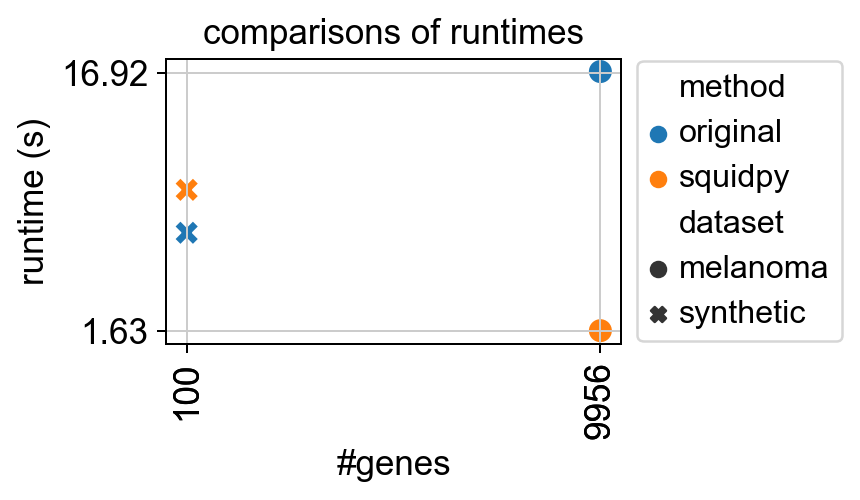

In [28]:
fig, ax = plt.subplots(tight_layout=True, dpi=180, figsize=(5, 3))
data = final_df
sns.scatterplot(
    data=data, x="genes", y="log_mean", hue="method", style="dataset", s=100, ax=ax
)
plt.xticks(data.genes.values, data.genes.values, rotation=90)
plt.yticks(
    np.round(data.log_mean.values[[0, 1]], 2),
    np.round(data["mean"].values[[0, 1]], 2),
)
ax.set_ylabel("runtime (s)")
ax.set_xlabel("#genes")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
_ = ax.set_title("comparisons of runtimes")